---
layout: page
title: GroupBy
nav_order: 6
---
[<img src="./colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/flaviovdf/fcd/blob/master/_lessons/04-Arrays.ipynb)

# Tópico 6 – Mais consultas e GroupBy

Os dados de hoje estão [aqui (Afonso Pena)](https://raw.githubusercontent.com/flaviovdf/fcd/main/assets/06-GroupBy/data/afonso_pena.csv) e [aqui (IMDB)](https://raw.githubusercontent.com/flaviovdf/fcd/main/assets/06-GroupBy/data/imdb.csv)

In [1]:
# Descomente e execute as linhas a seguir para usar o BabyPandas e o PandasTutor
# (faça isso apenas se não tiver instalado ainda)
# ! pip install babypandas
# ! pip install pandas_tutor

In [2]:
import babypandas as bpd
import numpy as np


# Estamos importando o matplotlib pela primeira vez.
# Serve para fazer gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
# Esssas linhas servem para que o Pandas Tutor execute
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}

### Hoje

- Recapitulação: consultas.
- Consultas com múltiplas condições.
- Grupo por.
- Prática extra, incluindo problemas de desafio.

### Sobre os dados: Ainda estamos na feira da Afonso Pena

O DataFrame `df` contém dados dos feirantes da Afonso Pena

In [4]:
# para rodar no colab use 'https://raw.githubusercontent.com/flaviovdf/fcd/main/assets/06-GroupBy/data/afonso_pena.csv'
# i.e., df = bpd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/main/assets/06-GroupBy/data/afonso_pena.csv')
df = bpd.read_csv('afonso_pena.csv')

produtos = df.get('NUMERO_PRODUTOS_CADASTRADOS')
area = df.get('AREA')

df = df.assign(
    DENSIDADE= produtos / area
)
df = df.set_index('ID_FEIRA_AFONSO_PENA_BARRACA')
df

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,
83,F.F2.V016,BARRACA CARMEN EMMANUEL DOS SANTOS SILVA,CARMEN EMMANUEL DOS SANTOS SILVA,JANA FONSECA VIEIRA,Criança,"BOLSA DE BEBÊ, MALA DE MATERNIDADE, NECESSÁIRE...",5.0,11.838911,0.422336
84,G.F3.V052,BARRACA CARMEN FERNANDA ROCHA DE ALCANTARA,CARMEN FERNANDA ROCHA DE ALCANTARA,KARINA RODRIGUES BRANDORFI,Bijouterias,"BRINCO, ANEL, PULSEIRA, COLAR, ARCO",5.0,11.838911,0.422336
85,E.F4.V003,BARRACA CARMEN LÚCIA CARVALHO DE ALMEIDA,CARMEN LÚCIA CARVALHO DE ALMEIDA,BARBARA ISABELLE CARVALHO DE PAULA,Vestuário Infantil,"VESTIDO, CONJUNTO, MACACÃO",3.0,11.838911,0.253402
86,E.F2.V004,BARRACA CECÍLIA PAGANO NEVES SALAZAR,CECÍLIA PAGANO NEVES SALAZAR,GISELE PAGANO NEVES SALAZAR,Vestuário Infantil,"MACACÃO, BLUSA, SAPATINHO",3.0,11.827592,0.253644
87,D.F2.V016,BARRACA CÉLIA APARECIDA DE SOUZA,CÉLIA APARECIDA DE SOUZA,EDSON PIRES DE SOUZA,Vestuário,"BLUSA, BERMUDA, ROUPA DE GINÁSTICA, SAIA, VEST...",7.0,11.827592,0.591836
...,...,...,...,...,...,...,...,...,...
1350,G.F4.V014,BARRACA HELCIO LICIO SILVA,HELCIO LICIO SILVA,GRAZIELA CRISTINA RAMALHO SILVA,Bijouterias,"ANEL, COLAR, BROCHE, BRINCO, PULSEIRA, ALIANÇA...",7.0,11.838911,0.591271
1351,J.F1.V004,BARRACA DIEGO DOS SANTOS DIAS,DIEGO DOS SANTOS DIAS,CELSO DE SOUZA LINHARES,Calçados,"RASTEIRINHA, SAPATO, SANDÁLIA",3.0,11.827592,0.253644
1352,D.F4.V050,BARRACA JAIR CORREA,JAIR CORREA,Keli Aparecida Batista Correa,Vestuário,"VESTIDO DE MALHA, BATA DE TECIDO, CONJUNTO, SA...",5.0,11.827592,0.422740


## Recapitulação: consultas

### O que é uma consulta? 🤔

- Uma "consulta" é um código que extrai linhas de um DataFrame para as quais determinadas condições são verdadeiras.
- Freqüentemente usamos consultas para _filtrar_ DataFrames para que contenham apenas as linhas que satisfaçam as condições declaradas em nossas perguntas.

### Como consultamos um DataFrame?

Para selecionar apenas determinadas linhas do DataFrame `df`:

1. Faça uma sequência (lista/array/Série) de `True`s (manter) e `False`s (jogar fora), geralmente fazendo uma comparação.
2. Em seguida, passe-o para `df[consulta]`.

### Comparações entre elementos

Existem vários tipos de comparações que podemos fazer.

|símbolo|significado|
|--------|--------|
|`==` |igual a |
|`!=` |diferente de |
|`<`|menos que|
|`<=`|menor ou igual a|
|`>`|maior que|
|`>=`|maior ou igual a|

## Exemplo 5: Qual o número de barracas de comida?

**Conceito principal**: consulta

### Estratégia

1. Consulta para extrair um DataFrame apenas das solicitações `'Alimentação'`.
2. Classifique por `'NUMERO_PRODUTOS_CADASTRADOS'` em ordem decrescente.
3. Extraia o primeiro elemento da coluna `'NOME_FEIRANTE'`.

In [5]:
comida = df[df.get('NOME_SETOR') == 'Alimentação']
comida.shape

(100, 9)

### Qual o (**A PESSOA**) feirante que vende mais produtos de comida?

In [6]:
comida = comida.sort_values(by='NUMERO_PRODUTOS_CADASTRADOS', ascending=False)
comida

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,
109,Y.F1.V012,BARRACA DAYSE PINTO NORBERTO,DAYSE PINTO NORBERTO,DJALMA ANTÔNIO DE FREITAS,Alimentação,"CERVEJA, TORRESMO, CHIPS, AZEITONA, REFRIGERAN...",21.0,33.611057,0.624794
1406,Z.F1.V007,BARRACA FRANCINERE AMARAL CARDOSO RIBEIRO DE S...,FRANCINERE AMARAL CARDOSO RIBEIRO DE SOUZA,RAYKARD AGUIAR DE JESUS,Alimentação,"CERVEJA, REFRIGERANTE, SUCO INDUSTRIALIZADO, E...",20.0,33.611058,0.595042
1015,X.F1.V020,BARRACA VERA LUIZA DE CARVALHO MACEDO,VERA LUIZA DE CARVALHO MACEDO,ORLANDINEIA ALVES,Alimentação,"CERVEJA, SANDUÍCHE NATURAL, BISCOITO, BOLO, RO...",17.0,33.595966,0.506013
380,Y.F1.V020,BARRACA MARGARET LÚCIA DA COSTA SILVA,MARGARET LÚCIA DA COSTA SILVA,MARIA TRINDADE DECIOLA DE JESUS,Alimentação,"ACARAJÉ, BOLINHO DE CARNE DE SOL, SUCO DE AÇAÍ...",16.0,33.539371,0.477051
26,Y.F2.V007,BARRACA ANA CALDEIRA GOMES,ANA CALDEIRA GOMES,PAULO HENRIQUE DE JESUS CALDEIRA,Alimentação,"CHURRASCO, PÃO DE QUEIJO, LEITE, REFRIGERANTE,...",14.0,33.611058,0.416530
...,...,...,...,...,...,...,...,...,...
1269,X.F2.V013,BARRACA FELIPE RODRIGUES ALVES DE DEUS,FELIPE RODRIGUES ALVES DE DEUS,SIDNEY ALVES DE DEUS,Alimentação,CHURRASCO,1.0,33.558728,0.029799
1457,X.F2.V011,BARRACA WELLINGTON ALVES DE DEUS,WELLINGTON ALVES DE DEUS,SANDRO ALVES DE DEUS,Alimentação,CHURRASCO,1.0,33.595966,0.029765
1423,X.F1.V003,BARRACA CELIA APARECIDA MONTEIRO CIPRIANO,CELIA APARECIDA MONTEIRO CIPRIANO,APARECIDA SANTOS MONTEIRO,Alimentação,ACARAJÉ,1.0,33.697508,0.029676


In [7]:
# iloc pega a n-ésimo linha. não busca por índice, sim por linha
comida.get('NOME_FEIRANTE').iloc[0]

'DAYSE PINTO NORBERTO'

### E se a condição não for satisfeita?

In [8]:
df[df.get('NOME_FEIRANTE') == 'FLAVIO FIGUEIREDO']

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,


### Verificação de conceito ✅

Qual expressão abaixo é avaliada como **o número total de produtos infantis**?

A. `df[df.get('NOME_SETOR') == 'Criança'].shape`

B. `df[df.get('NOME_SETOR') == 'Criança'].get('NUMERO_PRODUTOS_CADASTRADOS').sum()`

C.`df[df.get('NOME_SETOR') != 'Criança'].get('NUMERO_PRODUTOS_CADASTRADOS').sum()`

D. Mais de um dos itens acima.

### Atividade 🚘

**Pergunta**: Quais são os produtos vendidos pelo feirante que mais vende produtos infantis?

Escreva uma linha de código que avalie a resposta.

In [9]:
...

Ellipsis

## Exemplo 6: Quantos feirantes vendem Vestuário Infantil e Produtos Infantis?

**Conceito principal**: Consultas com múltiplas condições.

### Múltiplas condições

- Para escrever uma consulta com múltiplas condições, use `&` para "e" e `|` para "ou".
- **Você deve usar `(`parênteses`)` em torno de cada condição!**
- ⚠️ Não use as palavras-chave Python `and` e `or` aqui! Eles não se comportam como você gostaria.
- Consulte [BPD 10.3](https://notes.dsc10.com/02-data_sets/querying.html#multiple-conditions) para obter uma explicação.

In [10]:
df[(df.get('NOME_SETOR') == 'Vestuário Infantil') | (df.get('NOME_SETOR') == 'Criança')]

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,
83,F.F2.V016,BARRACA CARMEN EMMANUEL DOS SANTOS SILVA,CARMEN EMMANUEL DOS SANTOS SILVA,JANA FONSECA VIEIRA,Criança,"BOLSA DE BEBÊ, MALA DE MATERNIDADE, NECESSÁIRE...",5.0,11.838911,0.422336
85,E.F4.V003,BARRACA CARMEN LÚCIA CARVALHO DE ALMEIDA,CARMEN LÚCIA CARVALHO DE ALMEIDA,BARBARA ISABELLE CARVALHO DE PAULA,Vestuário Infantil,"VESTIDO, CONJUNTO, MACACÃO",3.0,11.838911,0.253402
86,E.F2.V004,BARRACA CECÍLIA PAGANO NEVES SALAZAR,CECÍLIA PAGANO NEVES SALAZAR,GISELE PAGANO NEVES SALAZAR,Vestuário Infantil,"MACACÃO, BLUSA, SAPATINHO",3.0,11.827592,0.253644
88,E.F3.V016,BARRACA CELINA MARIA SILVA MARCELINO,CELINA MARIA SILVA MARCELINO,ALBERTINO SERGIO MARCELINO,Vestuário Infantil,"FANTASIA, BERMUDA, CALÇA, SAIA, VESTIDO, CAMISA",6.0,11.827592,0.507288
94,E.F4.V029,BARRACA CLARICE CONCEIÇÃO DAS GRAÇAS DE OLIVEI...,CLARICE CONCEIÇÃO DAS GRAÇAS DE OLIVEIRA LIMA,ANGELICA MARIA DE OLIVEIRA LIMA,Vestuário Infantil,"CONJUNTO, SHORT, CUECA, CAMISA, CAMISETA, BLUS...",7.0,11.838911,0.591271
...,...,...,...,...,...,...,...,...,...
1426,F.F3.V010,BARRACA ALESSANDRA DE ABREU REIS,ALESSANDRA DE ABREU REIS,GLAUCIA HELENA DE ABREU TAVARES,Criança,"ACESSÓRIOS PARA CACHORRO, ALMOFADA, CAMA DE TE...",14.0,11.838911,1.182541
1435,E.F4.V006,BARRACA CILDA LUZIA GUALBERTO,CILDA LUZIA GUALBERTO,CILMA MARIA GUALBERTO DE OLIVEIRA,Vestuário Infantil,"VESTIDO, BOLERO, CUECA, BERMUDA, SAIA, BLUSA",6.0,11.827592,0.507288
1337,F.F2.V004,BARRACA MATHEUS PESSALI TIAGO BARBOSA,MATHEUS PESSALI TIAGO BARBOSA,MIRNA COSTA GONÇALVES,Criança,"QUADRO, TOALHA FRALDA, TOALHA, BRINQUEDO PEDAG...",6.0,11.838911,0.506803


In [11]:
# Dentro de de parênteses () ou de colchetes [] podemos quebrar a linha. ajuda na leitura
df[(df.get('NOME_SETOR') == 'Vestuário Infantil') | 
   (df.get('NOME_SETOR') == 'Criança')]

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,
83,F.F2.V016,BARRACA CARMEN EMMANUEL DOS SANTOS SILVA,CARMEN EMMANUEL DOS SANTOS SILVA,JANA FONSECA VIEIRA,Criança,"BOLSA DE BEBÊ, MALA DE MATERNIDADE, NECESSÁIRE...",5.0,11.838911,0.422336
85,E.F4.V003,BARRACA CARMEN LÚCIA CARVALHO DE ALMEIDA,CARMEN LÚCIA CARVALHO DE ALMEIDA,BARBARA ISABELLE CARVALHO DE PAULA,Vestuário Infantil,"VESTIDO, CONJUNTO, MACACÃO",3.0,11.838911,0.253402
86,E.F2.V004,BARRACA CECÍLIA PAGANO NEVES SALAZAR,CECÍLIA PAGANO NEVES SALAZAR,GISELE PAGANO NEVES SALAZAR,Vestuário Infantil,"MACACÃO, BLUSA, SAPATINHO",3.0,11.827592,0.253644
88,E.F3.V016,BARRACA CELINA MARIA SILVA MARCELINO,CELINA MARIA SILVA MARCELINO,ALBERTINO SERGIO MARCELINO,Vestuário Infantil,"FANTASIA, BERMUDA, CALÇA, SAIA, VESTIDO, CAMISA",6.0,11.827592,0.507288
94,E.F4.V029,BARRACA CLARICE CONCEIÇÃO DAS GRAÇAS DE OLIVEI...,CLARICE CONCEIÇÃO DAS GRAÇAS DE OLIVEIRA LIMA,ANGELICA MARIA DE OLIVEIRA LIMA,Vestuário Infantil,"CONJUNTO, SHORT, CUECA, CAMISA, CAMISETA, BLUS...",7.0,11.838911,0.591271
...,...,...,...,...,...,...,...,...,...
1426,F.F3.V010,BARRACA ALESSANDRA DE ABREU REIS,ALESSANDRA DE ABREU REIS,GLAUCIA HELENA DE ABREU TAVARES,Criança,"ACESSÓRIOS PARA CACHORRO, ALMOFADA, CAMA DE TE...",14.0,11.838911,1.182541
1435,E.F4.V006,BARRACA CILDA LUZIA GUALBERTO,CILDA LUZIA GUALBERTO,CILMA MARIA GUALBERTO DE OLIVEIRA,Vestuário Infantil,"VESTIDO, BOLERO, CUECA, BERMUDA, SAIA, BLUSA",6.0,11.827592,0.507288
1337,F.F2.V004,BARRACA MATHEUS PESSALI TIAGO BARBOSA,MATHEUS PESSALI TIAGO BARBOSA,MIRNA COSTA GONÇALVES,Criança,"QUADRO, TOALHA FRALDA, TOALHA, BRINQUEDO PEDAG...",6.0,11.838911,0.506803


### Pergunta Original: Quantos feirante nos dois setores?

In [12]:
df[(df.get('NOME_SETOR') == 'Vestuário Infantil') | 
   (df.get('NOME_SETOR') == 'Criança')].shape[0]

224

In [13]:
df.get('NOME_SETOR').unique()

array(['Criança', 'Bijouterias', 'Vestuário Infantil', 'Vestuário',
       'Calçados', 'Alimentação', 'Cintos, Bolsas e Acessórios',
       'Artes e Pintura', 'Arranjos e Complementos',
       'Decoração e Utilidades', 'Cama, Mesa, Banho e Tapeçaria',
       'Mobilário, Flores, Arranjos, Cestaria', 'Esculturas'],
      dtype=object)

### Verificação de conceito ✅

Cada uma das perguntas a seguir pode ser respondida consultando o DataFrame `requests`.

1. Qual categoria tem mais produtos, 'Artes e Pintura' ou 'Esculturas'?
2. Quantos feirantes vendem 'Vestuário'?
3. Qual o nome do feirante que vende mais 'Vestuário'?
4. Quantas das perguntas acima **exigem** que a consulta tenha **múltiplas condições**?


Tente escrever o código para responder a cada pergunta.

In [14]:
...

Ellipsis

### Selecionando linhas por posição com `.take`

- A consulta nos permite selecionar linhas que satisfaçam uma determinada _condição_.
- Também podemos selecionar linhas em _posições_ específicas com `.take([list_of_integer_positions])`. Isso mantém apenas as linhas cujas posições estão na lista especificada.
- Isso é análogo a usar `.iloc[]` em uma série.
- É raro precisar selecionar linhas por posição inteira. Consultar é **muito** mais útil.

In [15]:
df.take([1, 3, 5])

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,
84,G.F3.V052,BARRACA CARMEN FERNANDA ROCHA DE ALCANTARA,CARMEN FERNANDA ROCHA DE ALCANTARA,KARINA RODRIGUES BRANDORFI,Bijouterias,"BRINCO, ANEL, PULSEIRA, COLAR, ARCO",5.0,11.838911,0.422336
86,E.F2.V004,BARRACA CECÍLIA PAGANO NEVES SALAZAR,CECÍLIA PAGANO NEVES SALAZAR,GISELE PAGANO NEVES SALAZAR,Vestuário Infantil,"MACACÃO, BLUSA, SAPATINHO",3.0,11.827592,0.253644
88,E.F3.V016,BARRACA CELINA MARIA SILVA MARCELINO,CELINA MARIA SILVA MARCELINO,ALBERTINO SERGIO MARCELINO,Vestuário Infantil,"FANTASIA, BERMUDA, CALÇA, SAIA, VESTIDO, CAMISA",6.0,11.827592,0.507288


In [16]:
df.take(np.arange(5))

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,
83,F.F2.V016,BARRACA CARMEN EMMANUEL DOS SANTOS SILVA,CARMEN EMMANUEL DOS SANTOS SILVA,JANA FONSECA VIEIRA,Criança,"BOLSA DE BEBÊ, MALA DE MATERNIDADE, NECESSÁIRE...",5.0,11.838911,0.422336
84,G.F3.V052,BARRACA CARMEN FERNANDA ROCHA DE ALCANTARA,CARMEN FERNANDA ROCHA DE ALCANTARA,KARINA RODRIGUES BRANDORFI,Bijouterias,"BRINCO, ANEL, PULSEIRA, COLAR, ARCO",5.0,11.838911,0.422336
85,E.F4.V003,BARRACA CARMEN LÚCIA CARVALHO DE ALMEIDA,CARMEN LÚCIA CARVALHO DE ALMEIDA,BARBARA ISABELLE CARVALHO DE PAULA,Vestuário Infantil,"VESTIDO, CONJUNTO, MACACÃO",3.0,11.838911,0.253402
86,E.F2.V004,BARRACA CECÍLIA PAGANO NEVES SALAZAR,CECÍLIA PAGANO NEVES SALAZAR,GISELE PAGANO NEVES SALAZAR,Vestuário Infantil,"MACACÃO, BLUSA, SAPATINHO",3.0,11.827592,0.253644
87,D.F2.V016,BARRACA CÉLIA APARECIDA DE SOUZA,CÉLIA APARECIDA DE SOUZA,EDSON PIRES DE SOUZA,Vestuário,"BLUSA, BERMUDA, ROUPA DE GINÁSTICA, SAIA, VEST...",7.0,11.827592,0.591836


## Exemplo 7: Qual é área todal de cada setor?

**Conceito chave**: Agrupamento por uma coluna.

### Organizando solicitações por bairro

- Podemos encontrar o número total da área por setor;
- Por exemplo, `df[df.get('NOME_SETOR') == 'Criança'].get('AREA').sum()`.
- Mas como podemos encontrar o total para **todos** os setores ao mesmo tempo?

In [17]:
df[df.get('NOME_SETOR') == 'Criança'].get('AREA').sum()

1274.9974161428677

In [18]:
df[df.get('NOME_SETOR') == 'Vestuário Infantil'].get('AREA').sum()

1431.87438966735

Parece que tem que haver uma maneira melhor. E aqui está!

### GroupBy: dividir, agregar e combinar

Observe o que acontece quando usamos o método `.groupby` em `requests` com o argumento `'neighborhood'`.

In [19]:
df.groupby('NOME_SETOR').sum()

,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
NOME_SETOR,,,
Alimentação,733.0,3359.343283,21.820242
Arranjos e Complementos,379.0,615.329088,32.028438
Artes e Pintura,62.0,713.705731,2.606116
Bijouterias,1047.0,2165.445443,88.479383
Calçados,774.0,1881.447403,65.409968
...,...,...,...
Decoração e Utilidades,423.0,1033.677527,29.927868
Esculturas,6.0,47.580382,0.252205
"Mobilário, Flores, Arranjos, Cestaria",247.0,771.488214,14.012735


Observe que as contagens “totais” antes. O que acabou de acontecer? 🤯

### Um exemplo ilustrativo: Animais de estimação 🐱 🐶🐹

Considere os `animais de estimação` do DataFrame mostrados abaixo.


In [20]:
pets = bpd.DataFrame().assign(
    Species=['dog', 'cat', 'cat', 'dog', 'dog', 'hamster'],
    Color=['black', 'golden', 'black', 'white', 'golden', 'golden'],
    Weight=[40, 15, 20, 80, 25, 1],
    Age=[5, 8, 9, 2, 0.5, 3]
)
pets

,Species,Color,Weight,Age
0,dog,black,40,5.0
1,cat,golden,15,8.0
2,cat,black,20,9.0
3,dog,white,80,2.0
4,dog,golden,25,0.5
5,hamster,golden,1,3.0


### Visualizando `pets.groupby('Species').mean()`

1. **Divida** as linhas de `animais de estimação` em "grupos" de acordo com seus valores na coluna `'Espécies'`.
2. **Agregue** as linhas com o mesmo valor de `'Species'` tomando a `média` de todas as colunas numéricas.
3. **Combine** estes meios em um novo DataFrame que é indexado por `'Species'` e classificado por `'Species'` em ordem crescente.

Observe que o resultado contém apenas uma linha para gatos, uma linha para cães e uma linha para hamsters!

In [21]:
%%pt

pets.groupby('Species').mean()

### Tutor de Pandas

- Na última célula, vimos não apenas a saída do código, mas uma visualização do funcionamento interno do código.
- Isso graças ao Pandas Tutor, uma nova ferramenta desenvolvida por [Sam Lau](https://www.samlau.me), que ministrou este curso durante o verão.
- Pandas Tutor desenha diagramas para explicar o código `pandas` (e `babypandas`).
- Adicione `%%pt` ao topo de uma célula de código para explicar a última linha do código `babypandas`.
- Isso requer a importação do Pandas Tutor, o que já fizemos neste notebook.
- Você também pode usar o Pandas Tutor através de seu site, [pandastutor.com](https://pandastutor.com/).

In [22]:
# Without Pandas Tutor
pets.groupby('Species').mean()

,Weight,Age
Species,,
cat,17.500000,8.5
dog,48.333333,2.5
hamster,1.000000,3.0


In [23]:
%%pt

# With Pandas Tutor
pets.groupby('Species').mean()

### Voltar para solicitações de serviço Get It Done 👷

In [24]:
df

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,
83,F.F2.V016,BARRACA CARMEN EMMANUEL DOS SANTOS SILVA,CARMEN EMMANUEL DOS SANTOS SILVA,JANA FONSECA VIEIRA,Criança,"BOLSA DE BEBÊ, MALA DE MATERNIDADE, NECESSÁIRE...",5.0,11.838911,0.422336
84,G.F3.V052,BARRACA CARMEN FERNANDA ROCHA DE ALCANTARA,CARMEN FERNANDA ROCHA DE ALCANTARA,KARINA RODRIGUES BRANDORFI,Bijouterias,"BRINCO, ANEL, PULSEIRA, COLAR, ARCO",5.0,11.838911,0.422336
85,E.F4.V003,BARRACA CARMEN LÚCIA CARVALHO DE ALMEIDA,CARMEN LÚCIA CARVALHO DE ALMEIDA,BARBARA ISABELLE CARVALHO DE PAULA,Vestuário Infantil,"VESTIDO, CONJUNTO, MACACÃO",3.0,11.838911,0.253402
86,E.F2.V004,BARRACA CECÍLIA PAGANO NEVES SALAZAR,CECÍLIA PAGANO NEVES SALAZAR,GISELE PAGANO NEVES SALAZAR,Vestuário Infantil,"MACACÃO, BLUSA, SAPATINHO",3.0,11.827592,0.253644
87,D.F2.V016,BARRACA CÉLIA APARECIDA DE SOUZA,CÉLIA APARECIDA DE SOUZA,EDSON PIRES DE SOUZA,Vestuário,"BLUSA, BERMUDA, ROUPA DE GINÁSTICA, SAIA, VEST...",7.0,11.827592,0.591836
...,...,...,...,...,...,...,...,...,...
1350,G.F4.V014,BARRACA HELCIO LICIO SILVA,HELCIO LICIO SILVA,GRAZIELA CRISTINA RAMALHO SILVA,Bijouterias,"ANEL, COLAR, BROCHE, BRINCO, PULSEIRA, ALIANÇA...",7.0,11.838911,0.591271
1351,J.F1.V004,BARRACA DIEGO DOS SANTOS DIAS,DIEGO DOS SANTOS DIAS,CELSO DE SOUZA LINHARES,Calçados,"RASTEIRINHA, SAPATO, SANDÁLIA",3.0,11.827592,0.253644
1352,D.F4.V050,BARRACA JAIR CORREA,JAIR CORREA,Keli Aparecida Batista Correa,Vestuário,"VESTIDO DE MALHA, BATA DE TECIDO, CONJUNTO, SA...",5.0,11.827592,0.422740


In [25]:
df.groupby('NOME_SETOR').sum()

,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
NOME_SETOR,,,
Alimentação,733.0,3359.343283,21.820242
Arranjos e Complementos,379.0,615.329088,32.028438
Artes e Pintura,62.0,713.705731,2.606116
Bijouterias,1047.0,2165.445443,88.479383
Calçados,774.0,1881.447403,65.409968
...,...,...,...
Decoração e Utilidades,423.0,1033.677527,29.927868
Esculturas,6.0,47.580382,0.252205
"Mobilário, Flores, Arranjos, Cestaria",247.0,771.488214,14.012735


### Usando `.groupby` em geral

Resumindo, `.groupby` agrega todas as linhas com o mesmo valor em uma coluna especificada (por exemplo, `'NOME_SETOR'`) em uma única linha no DataFrame resultante, usando um método de agregação (por exemplo, `.sum()`) para combinar valores.

1. **Escolha uma coluna para agrupar**.
- `.groupby(column_name)` reunirá linhas que possuem o mesmo valor na coluna especificada (`column_name`).
- No slide anterior agrupamos por `'NOME_SETOR'`.
2. **Escolha um método de agregação**.
- O método de agregação será aplicado **dentro** de cada grupo.
- No exemplo anterior, aplicamos o método `.sum()` a cada `'NOME_SETOR'`.
- O método de agregação é aplicado individualmente a cada coluna
- Se não fizer sentido usar o método de agregação em uma coluna, a coluna será eliminada da saída – veremos isso com mais detalhes em breve (Tipo o nome do feirante).
- Métodos de agregação comuns incluem `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()` e `.min()`.

### Observação #1

- O índice mudou para nomes de SETORES.
- Em geral, os novos rótulos de linha são os *rótulos de grupo* (ou seja, os valores exclusivos na coluna em que agrupamos).

In [26]:
df

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,
83,F.F2.V016,BARRACA CARMEN EMMANUEL DOS SANTOS SILVA,CARMEN EMMANUEL DOS SANTOS SILVA,JANA FONSECA VIEIRA,Criança,"BOLSA DE BEBÊ, MALA DE MATERNIDADE, NECESSÁIRE...",5.0,11.838911,0.422336
84,G.F3.V052,BARRACA CARMEN FERNANDA ROCHA DE ALCANTARA,CARMEN FERNANDA ROCHA DE ALCANTARA,KARINA RODRIGUES BRANDORFI,Bijouterias,"BRINCO, ANEL, PULSEIRA, COLAR, ARCO",5.0,11.838911,0.422336
85,E.F4.V003,BARRACA CARMEN LÚCIA CARVALHO DE ALMEIDA,CARMEN LÚCIA CARVALHO DE ALMEIDA,BARBARA ISABELLE CARVALHO DE PAULA,Vestuário Infantil,"VESTIDO, CONJUNTO, MACACÃO",3.0,11.838911,0.253402
86,E.F2.V004,BARRACA CECÍLIA PAGANO NEVES SALAZAR,CECÍLIA PAGANO NEVES SALAZAR,GISELE PAGANO NEVES SALAZAR,Vestuário Infantil,"MACACÃO, BLUSA, SAPATINHO",3.0,11.827592,0.253644
87,D.F2.V016,BARRACA CÉLIA APARECIDA DE SOUZA,CÉLIA APARECIDA DE SOUZA,EDSON PIRES DE SOUZA,Vestuário,"BLUSA, BERMUDA, ROUPA DE GINÁSTICA, SAIA, VEST...",7.0,11.827592,0.591836
...,...,...,...,...,...,...,...,...,...
1350,G.F4.V014,BARRACA HELCIO LICIO SILVA,HELCIO LICIO SILVA,GRAZIELA CRISTINA RAMALHO SILVA,Bijouterias,"ANEL, COLAR, BROCHE, BRINCO, PULSEIRA, ALIANÇA...",7.0,11.838911,0.591271
1351,J.F1.V004,BARRACA DIEGO DOS SANTOS DIAS,DIEGO DOS SANTOS DIAS,CELSO DE SOUZA LINHARES,Calçados,"RASTEIRINHA, SAPATO, SANDÁLIA",3.0,11.827592,0.253644
1352,D.F4.V050,BARRACA JAIR CORREA,JAIR CORREA,Keli Aparecida Batista Correa,Vestuário,"VESTIDO DE MALHA, BATA DE TECIDO, CONJUNTO, SA...",5.0,11.827592,0.422740


In [27]:
df.groupby('NOME_SETOR').sum()

,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
NOME_SETOR,,,
Alimentação,733.0,3359.343283,21.820242
Arranjos e Complementos,379.0,615.329088,32.028438
Artes e Pintura,62.0,713.705731,2.606116
Bijouterias,1047.0,2165.445443,88.479383
Calçados,774.0,1881.447403,65.409968
...,...,...,...
Decoração e Utilidades,423.0,1033.677527,29.927868
Esculturas,6.0,47.580382,0.252205
"Mobilário, Flores, Arranjos, Cestaria",247.0,771.488214,14.012735


### Observação #2

A coluna `'NOME_FANTASIA'` e vároas outras desapareceram. Por que?

In [28]:
df

,CODIGO_VAGA,NOME_FANTASIA,NOME_FEIRANTE,NOME_PREPOSTO,NOME_SETOR,PRODUTOS,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
ID_FEIRA_AFONSO_PENA_BARRACA,,,,,,,,,
83,F.F2.V016,BARRACA CARMEN EMMANUEL DOS SANTOS SILVA,CARMEN EMMANUEL DOS SANTOS SILVA,JANA FONSECA VIEIRA,Criança,"BOLSA DE BEBÊ, MALA DE MATERNIDADE, NECESSÁIRE...",5.0,11.838911,0.422336
84,G.F3.V052,BARRACA CARMEN FERNANDA ROCHA DE ALCANTARA,CARMEN FERNANDA ROCHA DE ALCANTARA,KARINA RODRIGUES BRANDORFI,Bijouterias,"BRINCO, ANEL, PULSEIRA, COLAR, ARCO",5.0,11.838911,0.422336
85,E.F4.V003,BARRACA CARMEN LÚCIA CARVALHO DE ALMEIDA,CARMEN LÚCIA CARVALHO DE ALMEIDA,BARBARA ISABELLE CARVALHO DE PAULA,Vestuário Infantil,"VESTIDO, CONJUNTO, MACACÃO",3.0,11.838911,0.253402
86,E.F2.V004,BARRACA CECÍLIA PAGANO NEVES SALAZAR,CECÍLIA PAGANO NEVES SALAZAR,GISELE PAGANO NEVES SALAZAR,Vestuário Infantil,"MACACÃO, BLUSA, SAPATINHO",3.0,11.827592,0.253644
87,D.F2.V016,BARRACA CÉLIA APARECIDA DE SOUZA,CÉLIA APARECIDA DE SOUZA,EDSON PIRES DE SOUZA,Vestuário,"BLUSA, BERMUDA, ROUPA DE GINÁSTICA, SAIA, VEST...",7.0,11.827592,0.591836
...,...,...,...,...,...,...,...,...,...
1350,G.F4.V014,BARRACA HELCIO LICIO SILVA,HELCIO LICIO SILVA,GRAZIELA CRISTINA RAMALHO SILVA,Bijouterias,"ANEL, COLAR, BROCHE, BRINCO, PULSEIRA, ALIANÇA...",7.0,11.838911,0.591271
1351,J.F1.V004,BARRACA DIEGO DOS SANTOS DIAS,DIEGO DOS SANTOS DIAS,CELSO DE SOUZA LINHARES,Calçados,"RASTEIRINHA, SAPATO, SANDÁLIA",3.0,11.827592,0.253644
1352,D.F4.V050,BARRACA JAIR CORREA,JAIR CORREA,Keli Aparecida Batista Correa,Vestuário,"VESTIDO DE MALHA, BATA DE TECIDO, CONJUNTO, SA...",5.0,11.827592,0.422740


In [29]:
df.groupby('NOME_SETOR').sum()

,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
NOME_SETOR,,,
Alimentação,733.0,3359.343283,21.820242
Arranjos e Complementos,379.0,615.329088,32.028438
Artes e Pintura,62.0,713.705731,2.606116
Bijouterias,1047.0,2165.445443,88.479383
Calçados,774.0,1881.447403,65.409968
...,...,...,...
Decoração e Utilidades,423.0,1033.677527,29.927868
Esculturas,6.0,47.580382,0.252205
"Mobilário, Flores, Arranjos, Cestaria",247.0,771.488214,14.012735


### Colunas desaparecendo ✨🐇🎩

- O método de agregação – `.sum()`, neste caso – é aplicado a cada coluna.
- Se não fizer sentido aplicá-lo a uma determinada coluna, essa coluna desaparecerá.
- Por exemplo, não podemos somar strings, como na coluna `'NOME_FANTASIA'`.

### Observação #3

- O método de agregação é aplicado a cada coluna **separadamente**.
- As linhas do DataFrame resultante precisam ser interpretadas com cuidado.

In [30]:
df.groupby('NOME_SETOR').mean()

,NUMERO_PRODUTOS_CADASTRADOS,AREA,DENSIDADE
NOME_SETOR,,,
Alimentação,7.330000,33.593433,0.218202
Arranjos e Complementos,7.288462,11.833252,0.615931
Artes e Pintura,2.066667,23.790191,0.086871
Bijouterias,5.721311,11.833035,0.483494
Calçados,4.867925,11.833003,0.411383
...,...,...,...
Decoração e Utilidades,6.130435,14.980834,0.433737
Esculturas,3.000000,23.790191,0.126102
"Mobilário, Flores, Arranjos, Cestaria",5.880952,18.368767,0.333637


### Duas escolhas a serem feitas ao usar `.groupby`

Como encontramos **o número de diferentes serviços solicitados em cada bairro**?

**Duas opções**:
1. Por qual coluna devemos agrupar?
2. Que método de agregação devemos usar?
- Alguns mais comuns são `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()` e `.min()`.

In [31]:
...

Ellipsis

### Observação #4

- Para contar a quantidade de elementos por grupo use o `.size()`

In [32]:
num_barracas = df.groupby('NOME_SETOR').size()
num_barracas

NOME_SETOR
Alimentação                              100
Arranjos e Complementos                   52
Artes e Pintura                           30
Bijouterias                              183
Calçados                                 159
                                        ... 
Decoração e Utilidades                    69
Esculturas                                 2
Mobilário, Flores, Arranjos, Cestaria     42
Vestuário                                219
Vestuário Infantil                       121
Length: 13, dtype: int64

## Mais prática: conjunto de dados IMDb 🎞️

- Os dados estão [aqui](https://raw.githubusercontent.com/flaviovdf/fcd/main/assets/06-GroupBy/data/imdb.csv)

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/06-GroupBy/images/imdb.png)

In [33]:
# No colab, use este caminho 'https://raw.githubusercontent.com/flaviovdf/fcd/main/assets/06-GroupBy/data/imdb.csv'
imdb = bpd.read_csv('imdb.csv').set_index('Title').sort_values(by='Rating')
imdb

,Votes,Rating,Year,Decade
Title,,,,
Akira,91652,8.0,1988,1980
Per un pugno di dollari,124671,8.0,1964,1960
Guardians of the Galaxy,527349,8.0,2014,2010
The Man Who Shot Liberty Valance,49135,8.0,1962,1960
Underground,39447,8.0,1995,1990
...,...,...,...,...
Schindler's List,761224,8.9,1993,1990
12 Angry Men,384187,8.9,1957,1950
The Godfather: Part II,692753,9.0,1974,1970


### Pergunta: Quantos filmes aparecem em cada década?

In [34]:
imdb.groupby('Decade').count()

,Votes,Rating,Year
Decade,,,
1920,4,4,4
1930,7,7,7
1940,14,14,14
1950,30,30,30
1960,22,22,22
1970,21,21,21
1980,31,31,31
1990,42,42,42
2000,50,50,50


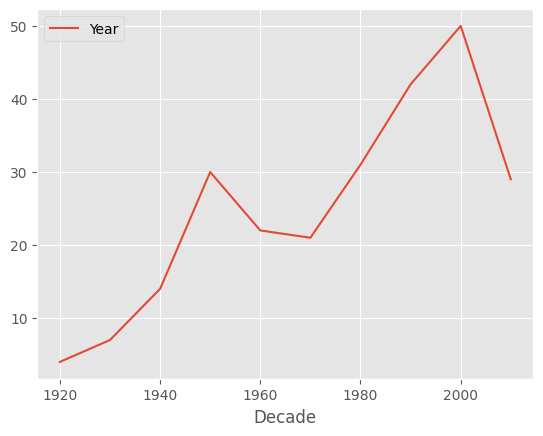

In [35]:
# We'll learn how to make plots like this in the next lecture!
imdb.groupby('Decade').count().plot(y='Year');

### Pergunta: Qual foi o filme de maior audiência da década de 1990?

Vamos tentar fazer isso de duas maneiras diferentes.

#### Sem agrupamento

In [36]:
%%pt
imdb[imdb.get('Decade') == 1990].sort_values('Rating', ascending=False).index[0]

_Nota:_ O comando para extrair o índice de um DataFrame é `.index` - sem parênteses! Isso é diferente da maneira como extraímos colunas, com `.get()`, porque o índice não é uma coluna.

#### Com agrupamento

In [37]:
%%pt
imdb.reset_index().groupby('Decade').max()

- Acontece que este método **não** produz a resposta correta.
- Quando usamos um método de agregação (por exemplo, `.max()`), a agregação é feita para cada coluna individualmente.
- Embora seja verdade que o filme com maior audiência da década de 1990 tem uma classificação de 9,2, esse filme **não** Imperdoável – em vez disso, Imperdoável é o filme mais recente no alfabeto entre todos os filmes da década de 1990.
- Usar o `max` não ajuda aqui.

## Problemas de desafio

Não abordaremos esses problemas em aula, mas eles estão aqui para você praticar com alguns exemplos mais difíceis. Para acessar as soluções, você precisará assistir [this solution walkthrough video](https://youtu.be/xg7rnjWnZ48) (início às 10h).

Antes de assistir ao vídeo, **tente resolver esses problemas por conta própria** – eles são uma ótima preparação para trabalhos de casa, projetos e exames!

### Pergunta: Há quantos anos mais de 3 filmes foram classificados acima de 8,5?

#### Além: Usando `.sum()` em um array/série booleana

- A soma de um array/série booleana fornece uma contagem do número de elementos `True`. Isso ocorre porque Python trata `True` como 1 e `False` como 0.
- Você pode usar esse fato aqui?

### Pergunta: Dos anos com mais de 3 filmes, qual teve a classificação média mais alta?

### Pergunta: Qual ano teve os títulos de filmes mais longos, em média?

_Dica:_ Use `.str.len()` na coluna ou índice que contém os nomes dos filmes.

### Pergunta: Qual é a classificação média dos filmes dos anos que tiveram pelo menos 3 filmes no Top 250?

## Resumo, da próxima vez

### Resumo

- Podemos escrever consultas que envolvam múltiplas condições, desde que:
- Coloque parênteses em todas as condições.
- Separe as condições usando `&` se você precisar que todas sejam verdadeiras, ou `|` se você precisar que pelo menos uma seja verdadeira.
- A chamada de método `df.groupby(column_name).agg_method()` **agrega** todas as linhas com o mesmo valor para `column_name` em uma única linha no DataFrame resultante, usando `agg_method()` para combinar valores.
- Métodos de agregação a serem conhecidos: `.count()`, `.sum()`, `.mean()`, `.median()`, `.max()` e `.min()`.

### Próxima vez

Uma imagem vale mais que 1000 palavras – é hora de visualizar!